# Imports

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py # to open the .h5 files
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from IPython.display import clear_output

!pip install itk
clear_output()
print('itk pip install done.')

print('All librairies sucessfully imported.')

itk pip install done.
All librairies sucessfully imported.


In [42]:
# import data

PATH_COLAB = '/content/drive/MyDrive/6_anevrism_segmentation/challenge_dataset.zip'
PATH_DEVICE = './challenge_dataset/'

try:
    from google.colab import drive
    print('Working on Colab')
    
    # connect your drive to the session
    drive.mount('/content/drive')

    # unzip data into the colab session
    ! unzip $PATH_COLAB
    
    # clear cell output
    clear_output()

    print('Data imported in Colab session.')
    
except:
    print('Working on your device.')
    
    data_exists = os.path.exists(PATH_DEVICE)
    
    if data_exists:
        print(f"Dataset found on device at : '{PATH_DEVICE}.'") 
    else:
        raise FileNotFoundError(f"Data folder not found at '{PATH_DEVICE}'")

Data imported in Colab session.


# Data viz

In [43]:
# get file names in the folder
PATH_DATASET = 'challenge_dataset'

file_names = os.listdir(PATH_DATASET)
N = len(file_names)
print('nb elements :', N)
print(file_names[:10])

nb elements : 103
['scan_56.h5', 'scan_18.h5', 'scan_21.h5', 'scan_54.h5', 'scan_69.h5', 'scan_86.h5', 'scan_31.h5', 'scan_23.h5', 'scan_88.h5', 'scan_26.h5']


In [44]:
# check a specific file
f = h5py.File(f'{PATH_DATASET}/scan_1.h5', 'r')
print(f.keys())

X, Y = np.array(f['raw']), np.array(f['label'])
print(f'shape X : {X.shape}, shape Y : {Y.shape}')

<KeysViewHDF5 ['label', 'raw']>
shape X : (64, 192, 192), shape Y : (64, 192, 192)


In [45]:
# Define a function to visualize the data
def explore_3dimage(i, j ,k):
    fig,ax = plt.subplots(1, 3, figsize=(30, 10))
    ax[0].imshow(X[i, :, :], cmap='gray')
    ax[0].imshow(Y[i, :, :], cmap='jet', alpha=0.4)
    ax[0].set_title(f'Slice YZ')
    ax[0].axis('off')

    ax[1].imshow(X[:, j, :], cmap='gray')
    ax[1].imshow(Y[:, j, :], cmap='jet', alpha=0.4)
    ax[1].set_title(f'Slice XZ')
    ax[1].axis('off')
    
    ax[2].imshow(X[:, :, k], cmap='gray')
    ax[2].imshow(Y[:, :, k], cmap='jet', alpha=0.4)
    ax[2].set_title(f'Slice XY')
    ax[2].axis('off')

    plt.show()
    
# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, 
         i=(0, X.shape[0] - 1), 
         j=(0, X.shape[1] - 1), 
         k=(0, X.shape[2] - 1));

interactive(children=(IntSlider(value=31, description='i', max=63), IntSlider(value=95, description='j', max=1…

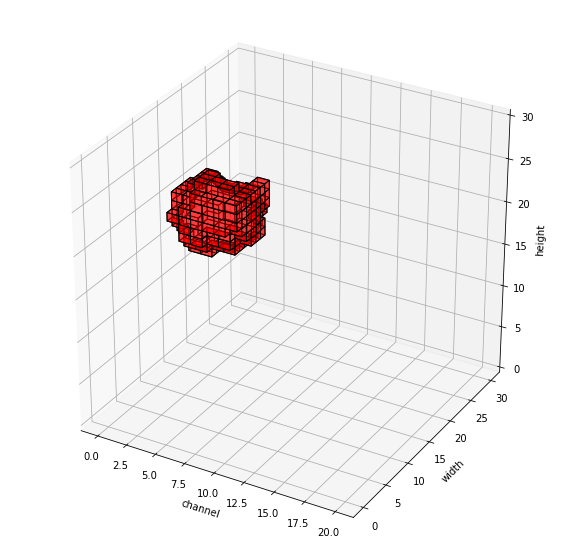

In [47]:
# plot the segmented zone 
# we make the assumption that the aneurysm is centered in the original image
xmin, xmax = 30, 50
ymin, ymax = 80, 110

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(Y[xmin:xmax, ymin:ymax, ymin:ymax], color='r', edgecolor='k', alpha=0.5)
ax.set(xlabel='channel', ylabel='width', zlabel='height')

plt.show()